In [199]:
import serial
import numpy as np
import matplotlib.pyplot as plt

FFT_N = 256

def GetLine():
    Line = []
    ser.write("1")
    i = 0
    while (i<2):
        Line.append(ser.readline().strip())
        i=i+1
    return Line

In [274]:
try:
    ser = serial.Serial('/dev/ttyACM1', 9600)
except serial.SerialException:
    ser = serial.Serial('/dev/ttyACM0', 9600)
print(ser.name) 

/dev/ttyACM0


In [281]:
rawData = GetLine()
signal = np.asarray(rawData[0].split(" ")[-1].split(";EOF")[0].split(";"))
data = np.asarray(rawData[1].split(" ")[-1].split(";EOF")[0].split(";"))
dataTime = int(rawData[1].split(" ")[2]) - int(rawData[1].split(" ")[1])

print 1.0/(dataTime/(FFT_N*1000000.00))

262295.081967


8kHz donne un pic a 29  pour f = 162436 -> 162*(29/(255/2))

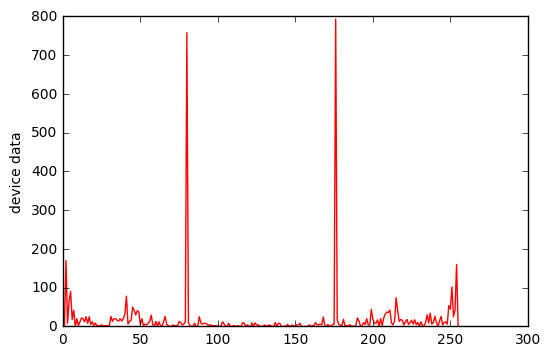

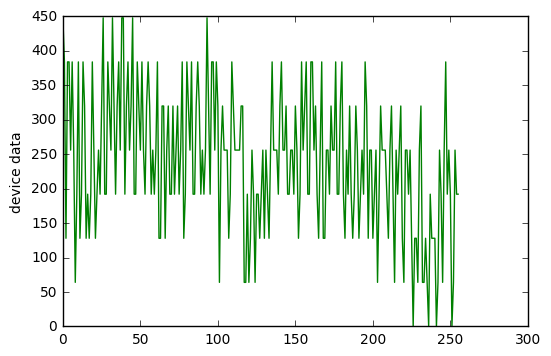

In [282]:
data[128] = 0
data[0] = 0
data[1] = 0
data[-1] = 0
plt.plot(data,"r")
plt.ylabel('device data')
plt.show()
plt.plot(signal[0:256],"g")
plt.ylabel('device data')
plt.show()

80


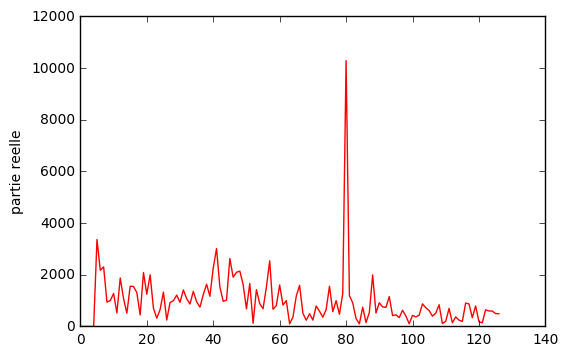

In [283]:
FFT = np.fft.fft(signal)
for i in range(5):
    FFT[i] = 0
    FFT[-i] = 0


#plt.plot(range(128),np.abs(FFT[0:128]))
plt.plot(np.abs(FFT[0:127]),"r")
plt.ylabel("partie reelle")

NinekHzPeak = np.argmax(np.abs(FFT[0:127]))
print NinekHzPeak
plt.show()